<a href="https://colab.research.google.com/github/feelzoo/MOV_Freeshipping_/blob/main/Shipping_cost_and_minimum_order_value_for_free_shipping_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shipping Rates & Minimum Order Value for Free Shipping 

In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob
from operator import itemgetter
from palettable.colorbrewer.diverging import *
from matplotlib import cm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/NADRI/Shopify_Order_Product_Returns'

Mounted at /content/gdrive


# 1. Dataset

In [3]:
order1 = f'{root_path}/orders_export_2.csv'
order2 = f'{root_path}/orders_export_1 2.csv'

orders = pd.concat(map(pd.read_csv,[order1,order2]),ignore_index = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: DtypeWarning: Columns (45,71) have mixed types.Specify dtype option on import or set low_memory=False.
  sort=sort,


In [4]:
orders2021 = pd.read_csv(f'{root_path}/orders_2021.csv')
orders2020 = pd.read_csv(f'{root_path}/orders_2020.csv')
orders2019 = pd.read_csv(f'{root_path}/orders_2019.csv')
orders2018 = pd.read_csv(f'{root_path}/orders_2018.csv')
orders2017 = pd.read_csv(f'{root_path}/orders_2017.csv')

In [5]:
orders['Fulfilled at'].fillna(0,inplace=True)

In [6]:
orders['Fulfilled at']

0        2019-07-29 16:07:41 -0400
1        2019-08-15 09:56:48 -0400
2        2019-07-29 16:07:12 -0400
3                                0
4                                0
                   ...            
24053    2019-07-30 16:03:59 -0400
24054                            0
24055    2019-07-30 16:03:21 -0400
24056    2019-07-30 16:03:01 -0400
24057    2019-07-29 16:08:06 -0400
Name: Fulfilled at, Length: 24058, dtype: object

In [7]:
orders['date'] = orders['Fulfilled at'].str.split('-')

In [8]:
orders.date.fillna('0',inplace=True)

In [9]:
orders['year'] = orders.apply(lambda row: row['date'][0],axis=1)

In [10]:
pd.set_option('display.max_rows',100)

## 2. Data Preprocessing

In [11]:
combined = orders.groupby('Name')['Lineitem quantity','Lineitem price',].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [12]:
combined2 = orders.groupby(['Name'])['Lineitem quantity','Total','Shipping'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
combined4 = orders.groupby(['Name','Shipping Method','year'])['Lineitem quantity','Lineitem price','Shipping'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [14]:
combined3 = orders.groupby(['Name','Shipping Method','Lineitem sku','year'])['Lineitem quantity','Lineitem price'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [15]:
pd.set_option('display.max_rows',100)

In [16]:
def cat(x):
    if x < 50:
        return '< $50'
    elif x < 75:
        return '\$50~$75'
    elif x < 100:
        return "\$75~$100"
    elif x <125:
        return '\$100~$125'
    elif x <150:
        return '\$125~$150'
    elif x <175:
        return '\$150~$175'
    elif x <200:
        return '\$175~$200'
    elif x < 250:
        return '\$200~$250'
    elif x <300:
        return '\$250~$300'
    elif x <350:
        return '\$300~$350'
    elif x < 400:
        return '\$350~$400'
    elif x< 500:
        return '\$400~$500'
    elif x<600:
        return '\$500~$600'
    elif x<700:
        return '\$600~$700'
    elif x<800:
        return '\$700~$800'
    elif x<900:
        return '\$800~$900'
    elif x<1000:
        return '\$900~$1000'
    else:
        return '\$1000 over'

In [17]:
def cat2(x):
    if x < 50:
        return '< $50'
    elif x < 75:
        return '\$50~$75'
    elif x < 100:
        return "\$75~$100"
    elif x <125:
        return '\$100~$125'
    elif x <150:
        return '\$125~$150'
    elif x <175:
        return '\$150~$175'
    elif x <200:
        return '\$175~$200'
    else:
        return '\$200 over'

In [18]:
def cat3(x):
    if x < 10:
        return '< $10'
    elif x < 25:
        return  '\$10~$25'
    elif x < 50:
        return '\$25~$50'
    elif x < 75:
        return '\$50~$75'
    elif x < 100:
        return "\$75~$100"
    else:
        return '\$100 over'

In [19]:
combined2

,Name,Lineitem quantity,Total,Shipping
0,#1-1001,1,81.79,0.00
1,#1084,1,61.99,0.00
2,#1085,2,113.29,0.00
3,#1087,2,113.29,0.00
4,#1092,3,191.31,15.00
...,...,...,...,...
15041,Shopify-2539-Nadri,1,37.45,4.95
15042,Shopify-2540-Nadri,2,89.00,0.00
15043,Shopify-2541-Nadri,7,254.15,0.00
15044,TEST-12346,1,150.00,0.00


In [20]:
#creating price_range column
combined2['price range'] = combined2['Total'].apply(cat)
combined2['price range2'] = combined2['Total'].apply(cat2)
 
#labels for plotting
labels = ['< $50','\$50~$75',"\$75~$100",'\$100~$125','\$125~$150','\$150~$175','\$175~$200','\$200~$250','\$250~$300','\$300~$350','\$350~$400','\$400~$500','\$500~$600','\$600~$700','\$700~$800','\$800~$900','\$900~$1000','\$1000 over']
labels2 = ['< $50','\$50~$75',"\$75~$100",'\$100~$125','\$125~$150','\$150~$175','\$175~$200','\$200 over'] 
labels3 = ['< $10','\$10~$25',"\$25~$50",'\$50~$75','\$75~$100','\$100 over']
labels4 = ['< $10','\$10~$25',"\$25~$50",'\$50~$75','\$75~$100']

#price range count
count = combined2['price range'].value_counts()
category = combined2['price range'].value_counts().index.tolist()

#price rnage count2
count2 = combined2['price range2'].value_counts()
category2 = combined2['price range2'].value_counts().index.tolist()




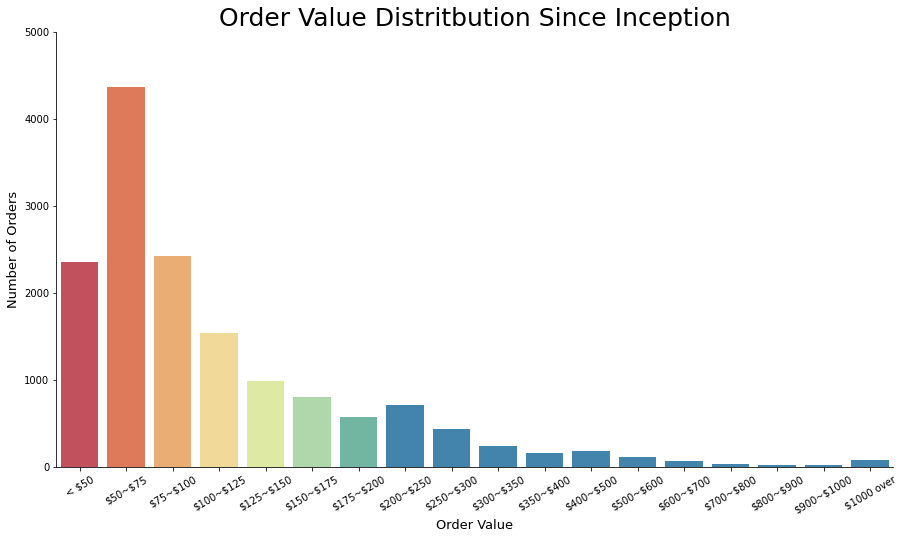

In [21]:
plt.figure(figsize=(15,8))
sns.color_palette()
ax = plt.subplot()
sns.countplot(data=combined2,x='price range',order=labels,palette = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd'])
plt.title('Order Value Distritbution Since Inception',fontsize=25)
plt.ylim([0,5000])
ax.set_xticklabels(labels,rotation=30)
sns.despine(right=True,top = True)
plt.xlabel('Order Value',fontsize = 13)
plt.ylabel('Number of Orders',fontsize = 13)
plt.savefig('Order Value Distribution since inception.png')

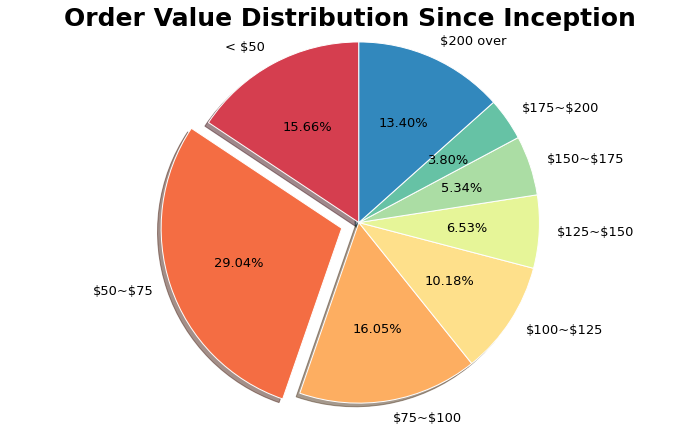

In [22]:
count3 = [2356,4369,2415,1531,983,804,572,2016]
color_pie = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']
#colors.reverse()
plt.figure(figsize=(10,6))
explode = [0,.1,0,0,0,0,0,0]
ax = plt.subplot()
patches, texts, autotexts = plt.pie(count3,labels = labels2,wedgeprops = {'linewidth':1,'edgecolor':'white'}, textprops = {'size': 13}, shadow=True,autopct = '%.2f%%',colors = color_pie,explode=explode,startangle=90)
plt.setp(autotexts,color = 'black',size='13')
plt.title('Order Value Distribution Since Inception',fontsize=25,fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig('Order Value Distribution Pie Since Inception.png')

In [23]:
#creating price_range column
test_test['price range'] = test_test['Total'].apply(cat)
test_test['price range2'] =  test_test['Total'].apply(cat2)
 
#labels for plotting
labels = ['< $50','\$50~$75',"\$75~$100",'\$100~$125','\$125~$150','\$150~$175','\$175~$200','\$200~$250','\$250~$300','\$300~$350','\$350~$400','\$400~$500','\$500~$600','\$600~$700','\$700~$800','\$800~$900','\$900~$1000','\$1000 over']
labels2 = ['< $50','\$50~$75',"\$75~$100",'\$100~$125','\$125~$150','\$150~$175','\$175~$200','\$200 over'] 

#price range count
count = combined2['price range'].value_counts()
category = combined2['price range'].value_counts().index.tolist()

#price rnage count2
count2_2021 = [883,2469,1248,822,538,420,319,1101]
category2 = combined2['price range2'].value_counts().index.tolist()

NameError: ignored

In [ ]:
plt.figure(figsize=(15,8))
sns.color_palette()
ax = plt.subplot()
sns.countplot(data=test_test,x='price range',order=labels,palette = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd'])
plt.title('Order Value Distritbution in 2021',fontsize=30)
plt.ylim([0,3000])
plt.xlabel('Order Value',fontsize=13)
plt.ylabel('Number of orders',fontsize=13)
ax.set_xticklabels(labels,rotation=30)
sns.despine(right=True,top = True)
plt.savefig('order value distribution in 2021.png')

In [ ]:
color_pie = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']
colors.reverse()
plt.figure(figsize=(10,6))
ax = plt.subplot()
patches, texts, autotexts = plt.pie(count2_2021,labels = labels2,wedgeprops={'linewidth': 1, 'edgecolor': 'white'},shadow=True,autopct = '%.2f%%',colors = color_pie,explode=explode,startangle=90,textprops={'size': 13})
plt.setp(autotexts,color = 'black',size='13')
plt.title('Order Value Distribution in 2021',fontsize=25,fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig('Order Value Distribution Pie Chart 2021')

In [24]:
y_2017 = combined4[combined4['year'] == '2017']
y_2018 = combined4[combined4['year'] == '2018']
y_2019 = combined4[combined4['year'] == '2019']
y_2020 = combined4[combined4['year'] == '2020']
y_2021 = combined4[combined4['year'] == '2021']

In [25]:
y_2017 = y_2017[y_2017['Shipping Method'] != 'In store shipping']
y_2018 = y_2018[y_2018['Shipping Method'] != 'In store shipping']

#2017 Shipping Method
next_2017 = y_2017[y_2017['Shipping Method'].isin(['Next Day Air - UPS'])]
second_2017 = y_2017[y_2017['Shipping Method'].isin(['2nd Day Air - UPS','Free USPS Priority Mail'])]
ground_2017 = y_2017[y_2017['Shipping Method'].isin(['Free Ground Shipping - UPS','Ground - UPS'])]
other_2017 = y_2017[y_2017['Shipping Method'].isin(['In store shipping','Express Worldwide - DHL','Custom'])]

#2018 Shipping Method
next_2018 = y_2018[y_2018['Shipping Method'].isin(['Next Day Air - UPS'])]
second_2018 = y_2018[y_2018['Shipping Method'].isin(['2nd Day Air - UPS','Free USPS Priority Mail','2nd Day - UPS','2nd Day UPS'])]
ground_2018 = y_2018[y_2018['Shipping Method'].isin(['Free Ground Shipping - UPS','Ground Shipping - UPS','UPS GROUND SHIPPING','UPS GROUND SHIPPING FEE','UPS Ground','UPS Ground Delivery Service','UPS Ground Shipping','UPS Ground Shipping Fee','UPS STANDARD SHIPPING FEE','UPS Standard Ground','UPS Ground Service','UPS GROUND SERVICE','Standard UPS Ground Shipping','STANDARD UPS GROUND SERVICE','STANDARD UPS GROUND SERVICE','SHIPPING UPS GROUND','UPS SHIPPING FEE','UPS Shipping Fee','Ground - UPS'])]
other_2018 = y_2018[y_2018['Shipping Method'].isin(['In store shipping','Express Worldwide - DHL','Custom','DHL Express Worldwide Shipping Fee'])]

#2019 Shpping Method
next_2019 = y_2019[y_2019['Shipping Method'].isin(['Next Day Air - UPS','Free Overnight UPS','Free Next Day UPS','USPS PRIORITY EXPRESS SERVICE'])]
second_2019 = y_2019[y_2019['Shipping Method'].isin(['2nd Day UPS','2nd Day - UPS','2nd Day Air - UPS','Free USPS Priority Mail','2nd Day - UPS','2nd Day UPS','Free 2nd Day UPS','2nd Day UPS - Holiday Promotion'])]
ground_2019 = y_2019[y_2019['Shipping Method'].isin(['Free Ground Shipping - UPS','Ground Shipping - UPS','USPS Free Shipping','UPS GROUND SHIPPING','UPS GROUND SHIPPING FEE','UPS Ground','UPS Ground Delivery Service','UPS Ground Shipping','UPS Ground Shipping Fee','UPS STANDARD SHIPPING FEE','UPS Standard Ground','UPS Ground Service','UPS GROUND SERVICE','Standard UPS Ground Shipping','STANDARD UPS GROUND SERVICE','STANDARD UPS GROUND SERVICE','SHIPPING UPS GROUND','UPS SHIPPING FEE','UPS Shipping Fee','UPS Ground Shipping','Free Ground Shipping','UPS GROUND SHIPPING','Free Ground Shipping','UPS Ground Shipping Fee','UPS Ground Shipping','Free shipping'])]
other_2019 = y_2019[y_2019['Shipping Method'].isin(['In store shipping','Express Worldwide - DHL','Custom','DHL Express Worldwide Shipping Fee','DHL WORLDWIDE EXPRESS SHIPMENT','DHL WORLDWIDE EXPRESS SHIPPING FEE','DHL - EXPRESS WORLDWIDE SHIPPING FEE','DHL Worldwide Express','Worldwide Express - DHL','Worldwide Express - DHL','DHL WorldWide Express Shipping Fee'])]


#2020 Shipping Method
next_2020 = y_2020[y_2020['Shipping Method'].isin(['Next Day Air - UPS','Free Overnight UPS','USPS PRIORITY EXPRESS SERVICE','Next Day Air','Free Next Day Air - UPS'])]
second_2020 = y_2020[y_2020['Shipping Method'].isin(['2nd Day UPS','2nd Day - UPS','2nd Day Air - UPS','Free USPS Priority Mail','2nd Day - UPS','2nd Day UPS','Free 2nd Day UPS','2nd Day UPS - Holiday Promotion','Free 2nd Day Air - UPS','2nd Day Air - UPS','Free 2nd day - UPS','2nd Day UPS','Free 2nd Day UPS'])]
ground_2020 = y_2020[y_2020['Shipping Method'].isin(['Free Ground Shipping - UPS','Ground Shipping - UPS','USPS Free Shipping','Flat Rate Shipping  - USPS','USPS - Flat Rate Shipping','UPS GROUND SHIPPING','UPS GROUND SHIPPING FEE','UPS Ground','UPS Ground Delivery Service','UPS Ground Shipping','UPS Ground Shipping Fee','UPS STANDARD SHIPPING FEE','UPS Standard Ground','UPS Ground Service','UPS GROUND SERVICE','Standard UPS Ground Shipping','STANDARD UPS GROUND SERVICE','STANDARD UPS GROUND SERVICE','SHIPPING UPS GROUND','UPS SHIPPING FEE','UPS Shipping Fee','UPS Ground Shipping','Free Ground Shipping','Free shipping','UPS Ground Shipping Fee'])]
other_2020 = y_2020[y_2020['Shipping Method'].isin(['In store shipping','Express Worldwide - DHL','Custom','DHL Express Worldwide Shipping Fee','DHL WORLDWIDE EXPRESS SHIPMENT','DHL WORLDWIDE EXPRESS SHIPPING FE','DHL - EXPRESS WORLDWIDE SHIPPING FEE','DHL Worldwide Express','Worldwide'])]

#2021 Shipping Method
next_2021 = y_2021[y_2021['Shipping Method'].isin(['Next Day Air - UPS','Free Overnight UPS','USPS PRIORITY EXPRESS SERVICE','Next Day Air','Free Next Day Air - UPS'])]
second_2021 = y_2021[y_2021['Shipping Method'].isin(['2nd Day UPS','2nd Day - UPS','2nd Day Air - UPS','Free USPS Priority Mail','2nd Day - UPS','2nd Day UPS','Free 2nd Day UPS','2nd Day UPS - Holiday Promotion','Free 2nd Day Air - UPS','2nd Day Air - UPS','Free 2nd day - UPS','2nd Day UPS','Free 2nd Day UPS','2nd Day Air - FedEx','Free 2nd Day Air - FedEx','Free 2nd Day Air - UPS'])]
ground_2021 = y_2021[y_2021['Shipping Method'].isin(['Free Ground Shipping - UPS','Ground Shipping - UPS','USPS Free Shipping','Flat Rate Shipping  - USPS','USPS - Flat Rate Shipping','UPS GROUND SHIPPING','UPS GROUND SHIPPING FEE','UPS Ground','UPS Ground Delivery Service','UPS Ground Shipping','UPS Ground Shipping Fee','UPS STANDARD SHIPPING FEE','UPS Standard Ground','UPS Ground Service','UPS GROUND SERVICE','Standard UPS Ground Shipping','STANDARD UPS GROUND SERVICE','STANDARD UPS GROUND SERVICE','SHIPPING UPS GROUND','UPS SHIPPING FEE','UPS Shipping Fee','UPS Ground Shipping','Free Ground Shipping','Free shipping','UPS Ground Shipping Fee','Flat Rate Shipping  - USPS','Free UPS Ground shipping','Free Ground Shipping -UPS'])]
other_2021 = y_2021[y_2021['Shipping Method'].isin(['In store shipping','Express Worldwide - DHL','Custom','DHL Express Worldwide Shipping Fee','DHL WORLDWIDE EXPRESS SHIPMENT','DHL WORLDWIDE EXPRESS SHIPPING FE','DHL - EXPRESS WORLDWIDE SHIPPING FEE','DHL Worldwide Express','Worldwide','Express Worldwide - DHL (0.7 lb)'])]


In [26]:
y_2017['Shipping Method'].value_counts()

Free Ground Shipping - UPS    140
2nd Day Air - UPS              13
Express Worldwide - DHL         9
Next Day Air - UPS              5
Free USPS Priority Mail         3
Custom                          1
Ground - UPS                    1
Name: Shipping Method, dtype: int64

In [27]:
shipping_price = orders[['year','Shipping Method','Shipping']]

In [28]:
method = ['Ground','2nd Day Air','Next Day Air','Other']

In [29]:
shipping_2017 = pd.DataFrame(data = [[len(ground_2017),len(second_2017),len(next_2017),len(other_2017)]],columns=method)
shipping_2018 = pd.DataFrame(data = [[len(ground_2018),len(second_2018),len(next_2018),len(other_2018)]],columns=method)
shipping_2019 = pd.DataFrame(data = [[len(ground_2019),len(second_2019),len(next_2019),len(other_2019)]],columns=method)
shipping_2020 = pd.DataFrame(data = [[len(ground_2020),len(second_2020),len(next_2020),len(other_2020)]],columns=method)
shipping_2021 = pd.DataFrame(data = [[len(ground_2021),len(second_2021),len(next_2021),len(other_2021)]],columns=method)



In [30]:
shipping_2017 = list([len(ground_2017),len(second_2017),len(next_2017),len(other_2017)])
shipping_2018 = list([len(ground_2018),len(second_2018),len(next_2018),len(other_2018)])
shipping_2019 = list([len(ground_2019),len(second_2019),len(next_2019),len(other_2019)])
shipping_2020 = list([len(ground_2020),len(second_2020),len(next_2020),len(other_2020)])
shipping_2021 = list([len(ground_2021),len(second_2021),len(next_2021),len(other_2021)])

In [31]:
shipping_stats = [shipping_2017,shipping_2018,shipping_2019,shipping_2020,shipping_2021]

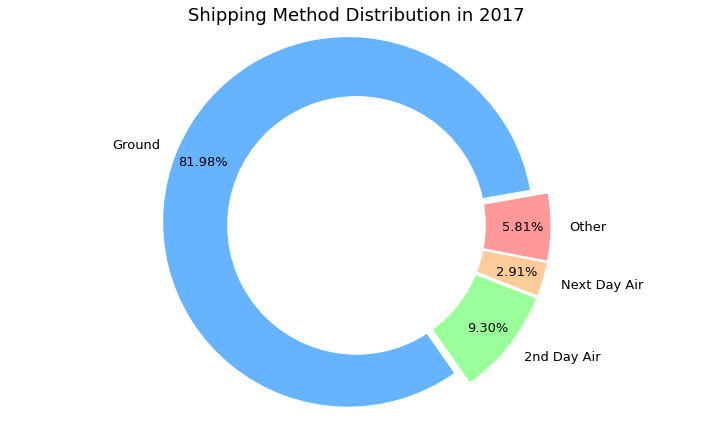

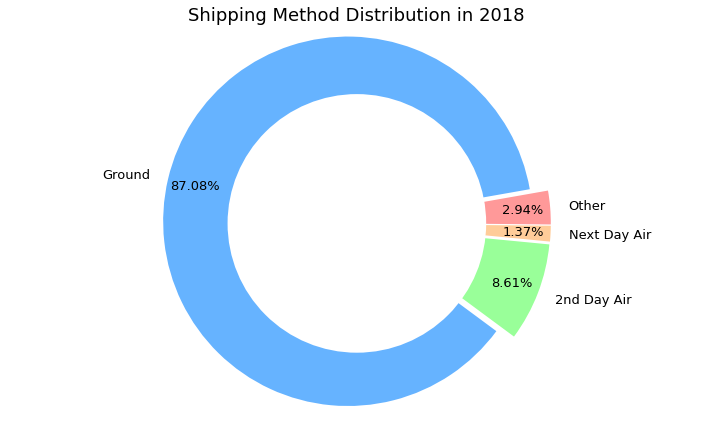

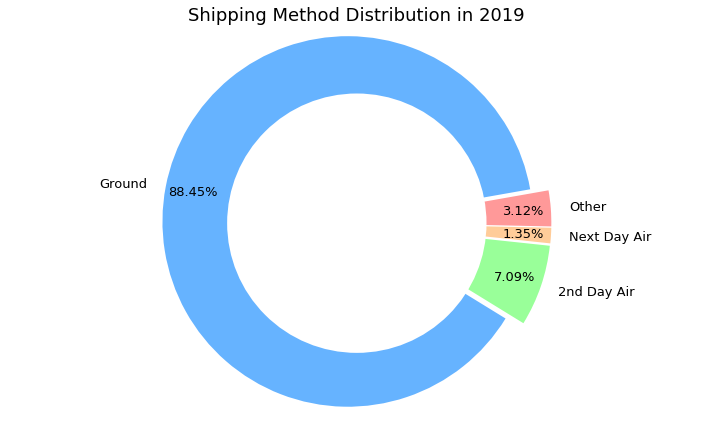

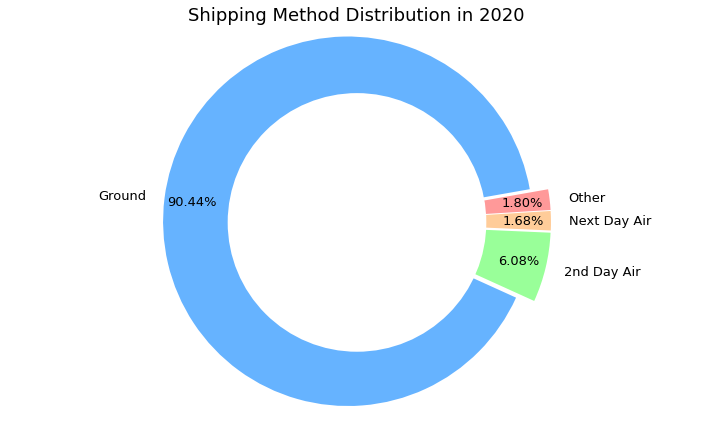

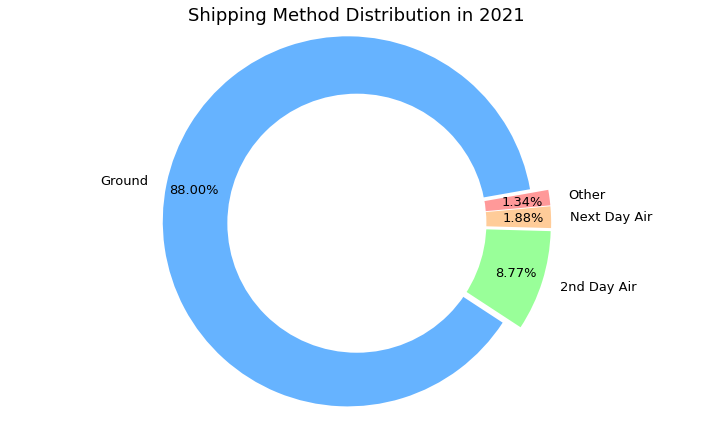

In [32]:
for i in range(len(shipping_stats)):
    plt.figure(figsize=(10,6))
    colors = ['#66b3ff','#99ff99','#ffcc99','#ff9999']
    explode = (.05,.05,.05,.05)
    plt.pie(shipping_stats[i],labels = method,colors=colors, autopct = '%.2f%%',textprops = {'fontsize': 13},explode=explode,startangle=10,pctdistance=.85)
    plt.title('Shipping Method Distribution in {0}'.format(2017+i),fontsize=18)
    center_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('Shipping Method in {0}.png'.format(2017+i))
    plt.show()
    

In [33]:
product = pd.read_csv(f'{root_path}/products.csv')

In [34]:
pd.set_option('display.min_rows',10)

In [35]:
product[product.isnull().any(axis=1)]

,Handle,Title,Body (HTML),Vendor,Standard Product Type,Custom Product Type,Tags,Published,Option1 Name,Option1 Value,...,Google Shopping / Custom Label 0,Google Shopping / Custom Label 1,Google Shopping / Custom Label 2,Google Shopping / Custom Label 3,Google Shopping / Custom Label 4,Variant Image,Variant Weight Unit,Variant Tax Code,Cost per item,Status
0,deluxe-cushion-cz-linear-earrings,DELUXE CUSHION CZ LINEAR EARRINGS,<span>A shimmering cascade of cushion-cut cubi...,NADRI,NaN,EARRINGS,"BRIDAL, EARRING, Style_Drop",True,Metal,Brass,...,NaN,NaN,NaN,NaN,NaN,NaN,lb,NaN,NaN,active
1,sterling-silver-stunner-layered-green-necklace,STERLING SILVER STUNNER LAYERED GREEN NECKLACE,<p><strong>ABOUT THE PRODUCT</strong><br> The ...,NADRI.925,NaN,NECKLACES,"NECKLACE, Style_Color Stone, Style_Layered",True,Metal,Sterling Silver,...,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,active
2,sterling-silver-stunner-layered-green-necklace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sterling-silver-stunner-swag-drop-green-earrings,STERLING SILVER STUNNER SWAG DROP GREEN EARRINGS,<p><strong>ABOUT THE PRODUCT</strong><br><br><...,NADRI.925,NaN,EARRING,"EARRING, EARRINGS",False,Metal,Sterling Silver,...,NaN,NaN,NaN,NaN,NaN,NaN,lb,NaN,NaN,draft
4,sterling-silver-stunner-set-of-earrings,STERLING SILVER STUNNER SET OF EARRINGS,<p><strong>ABOUT THE PRODUCT</strong><br> Set ...,NADRI.925,NaN,EARRINGS,"EARRINGS, Style_Cuff, Style_Huggie, STYLE_SET,...",True,Metal,Sterling Silver,...,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,mini-east-west-earrings,TINY EAST WEST CZ EARRINGS - 3 Colors,"<p>Why have only one stone, when you can have ...",NADRI.925,NaN,EARRINGS,"BRIDAL, EARRING, ESSENTIALS, Style_East West, ...",False,Metal,Sterling Silver,...,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,archived
3305,mini-east-west-earrings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3306,skinny-east-west-earrings,SKINNY EAST WEST CZ EARRINGS - 3 Colors,"<p>Delicate and charming, these earrings are e...",NADRI.925,NaN,EARRINGS,"__label:SALE, EARRING, ESSENTIALS, sale, Style...",True,Metal,Sterling Silver,...,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,active
3307,skinny-east-west-earrings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sterling Silver,...,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,NaN


In [36]:
product1 = product.dropna(subset=['Variant SKU'])

In [37]:
product1['price range'] = product1['Variant Price'].apply(cat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
product2 = product.dropna(subset = ['Title'])
product3 = product2[product2['Status'].str.contains('active')]

In [39]:
product2['price range'] = product2['Variant Price'].apply(cat)
product2['price range2'] = product2['Variant Price'].apply(cat2)
product2['price range3'] = product2['Variant Price'].apply(cat3)
product3['price range'] = product3['Variant Price'].apply(cat)
product3['price range2'] = product3['Variant Price'].apply(cat2)
product3['price range3'] = product3['Variant Price'].apply(cat3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [40]:
product1['price range'].value_counts()

< $50          679
\$50~$75       486
\$75~$100      245
\$125~$150     124
\$100~$125      96
\$400~$500      71
\$175~$200      62
\$200~$250      50
\$150~$175      50
\$250~$300      48
\$300~$350      25
\$350~$400      24
\$1000 over     19
\$500~$600      12
\$700~$800       9
\$600~$700       8
\$800~$900       7
\$900~$1000      3
Name: price range, dtype: int64

In [41]:
product3['price range3'].value_counts()

\$100 over    213
\$50~$75      171
\$25~$50      136
\$75~$100      88
\$10~$25        3
< $10           1
Name: price range3, dtype: int64

In [42]:
pd.set_option('display.max_columns',None)

In [43]:
product3.columns

Index(['Handle', 'Title', 'Body (HTML)', 'Vendor', 'Standard Product Type',
       'Custom Product Type', 'Tags', 'Published', 'Option1 Name',
       'Option1 Value', 'Option2 Name', 'Option2 Value', 'Option3 Name',
       'Option3 Value', 'Variant SKU', 'Variant Grams',
       'Variant Inventory Tracker', 'Variant Inventory Qty',
       'Variant Inventory Policy', 'Variant Fulfillment Service',
       'Variant Price', 'Variant Compare At Price',
       'Variant Requires Shipping', 'Variant Taxable', 'Variant Barcode',
       'Image Src', 'Image Position', 'Image Alt Text', 'Gift Card',
       'SEO Title', 'SEO Description',
       'Google Shopping / Google Product Category', 'Google Shopping / Gender',
       'Google Shopping / Age Group', 'Google Shopping / MPN',
       'Google Shopping / AdWords Grouping',
       'Google Shopping / AdWords Labels', 'Google Shopping / Condition',
       'Google Shopping / Custom Product', 'Google Shopping / Custom Label 0',
       'Google Shopping / 

In [44]:
p10 = product3[product3['price range3'] == '< $10'][['Variant SKU','Title','Variant Price','price range3']]
p1025 = product3[product3['price range3'] == '\$10~$25'][['Variant SKU','Title','Variant Price','price range3']]
p2550 = product3[product3['price range3'] == '\$25~$50'][['Variant SKU','Title','Variant Price','price range3']]
p10.to_excel(f"{root_path}/p10.xlsx")
p1025.to_excel(f"{root_path}/p1025.xlsx")
p2550.to_excel(f"{root_path}/p2550.xlsx")



In [45]:
product3[product3['price range3'] == '\$25~$50']['Variant Price'].mean()

39.341911764705884

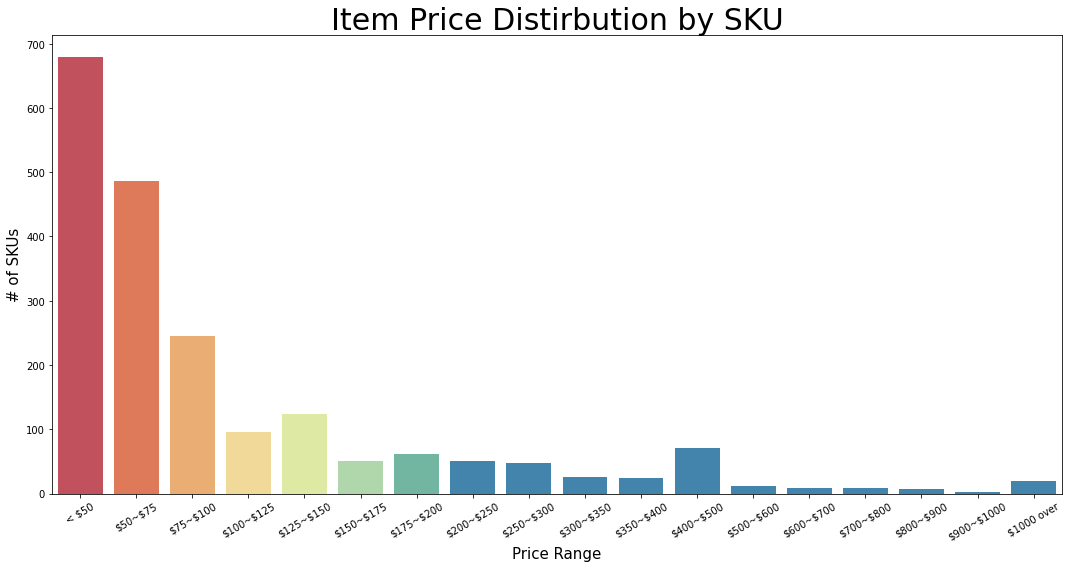

In [46]:
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.countplot(data = product1, x= 'price range',order = labels, palette = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd'])
ax.set_xticklabels(labels,rotation=30,color='black')
plt.xlabel('Price Range',fontsize= 15)
plt.ylabel('# of SKUs',fontsize = 15)
plt.title('Item Price Distirbution by SKU',fontsize = 30)
plt.tight_layout()
plt.savefig('Item Price Distribution by SKU.png')

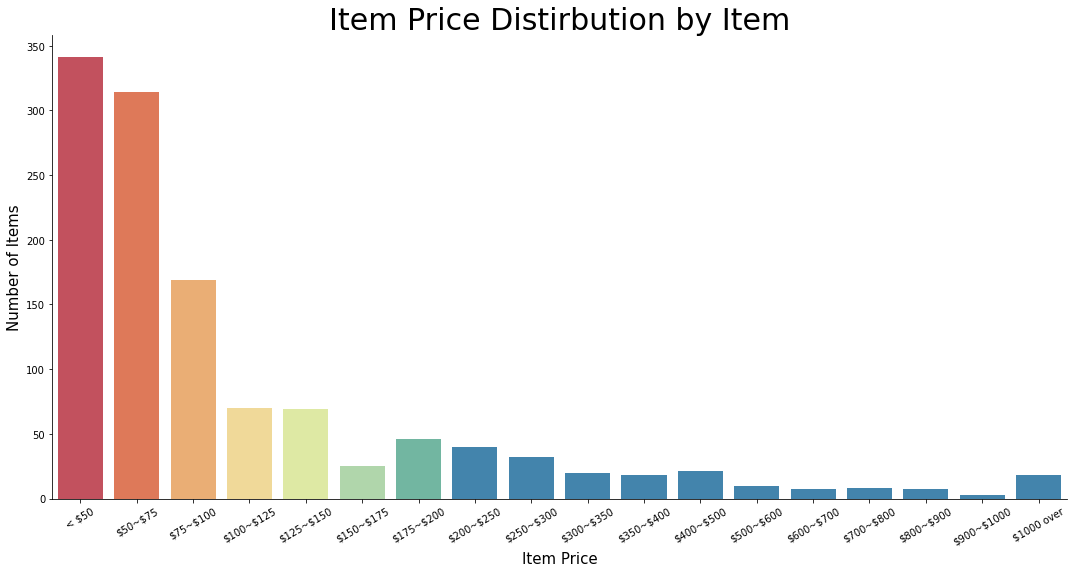

In [47]:
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.countplot(data = product2, x= 'price range',order = labels,palette = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd','#3288bd'])
ax.set_xticklabels(labels,rotation=30,color='black')
plt.title('Item Price Distirbution by Item',fontsize = 30)
plt.tight_layout()
plt.xlabel('Item Price',fontsize=15)
plt.ylabel('Number of Items',fontsize=15)
sns.despine(top = True, right = True)
plt.savefig('Item Price Distribution by Item.png')

In [48]:
product3['price range3'].value_counts()

\$100 over    213
\$50~$75      171
\$25~$50      136
\$75~$100      88
\$10~$25        3
< $10           1
Name: price range3, dtype: int64

In [49]:
product4 = product3[product3['price range3'] != '\$100 over']

In [50]:
product4

,Handle,Title,Body (HTML),Vendor,Standard Product Type,Custom Product Type,Tags,Published,Option1 Name,Option1 Value,Option2 Name,Option2 Value,Option3 Name,Option3 Value,Variant SKU,Variant Grams,Variant Inventory Tracker,Variant Inventory Qty,Variant Inventory Policy,Variant Fulfillment Service,Variant Price,Variant Compare At Price,Variant Requires Shipping,Variant Taxable,Variant Barcode,Image Src,Image Position,Image Alt Text,Gift Card,SEO Title,SEO Description,Google Shopping / Google Product Category,Google Shopping / Gender,Google Shopping / Age Group,Google Shopping / MPN,Google Shopping / AdWords Grouping,Google Shopping / AdWords Labels,Google Shopping / Condition,Google Shopping / Custom Product,Google Shopping / Custom Label 0,Google Shopping / Custom Label 1,Google Shopping / Custom Label 2,Google Shopping / Custom Label 3,Google Shopping / Custom Label 4,Variant Image,Variant Weight Unit,Variant Tax Code,Cost per item,Status,price range,price range2,price range3
24,social-lights-green-double-layer-necklace,SOCIAL LIGHTS GREEN DOUBLE LAYER NECKLACE,"<p><meta charset=""utf-8""><strong>ABOUT THE PRO...",NADRI,NaN,NECKLACES,"NECKLACE, Style_Color Stone, Style_Layered",True,Metal,Brass,Color,Gold,NaN,NaN,AP40326GEG,0.0,shopify,5.0,deny,manual,75.0,NaN,True,True,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,1.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,active,\$75~$100,\$75~$100,\$75~$100
26,social-lights-double-layer-necklace,SOCIAL LIGHTS DOUBLE LAYER NECKLACE,<p><strong>ABOUT THE PRODUCT</strong><br>Simpl...,NADRI,NaN,NECKLACES,"NECKLACE, Style_Layered",True,Metal,Brass,Color,Gold,NaN,NaN,AP40326GCZ,0.0,shopify,10.0,deny,manual,75.0,NaN,True,True,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,1.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,active,\$75~$100,\$75~$100,\$75~$100
28,social-lights-green-frontal-necklace,SOCIAL LIGHTS GREEN FRONTAL NECKLACE,"<p><meta charset=""utf-8""><strong>ABOUT THE PRO...",NADRI,NaN,NECKLACES,"NECKLACE, Style_Color Stone, Style_Frontal",True,Metal,Brass,Color,Gold,NaN,NaN,AN40325GEG,0.0,shopify,16.0,deny,manual,75.0,NaN,True,True,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,1.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,active,\$75~$100,\$75~$100,\$75~$100
30,social-lights-cz-frontal-necklace,SOCIAL LIGHTS CZ FRONTAL NECKLACE,<p><strong>ABOUT THE PRODUCT</strong><br>A lin...,NADRI,NaN,NECKLACES,"NECKLACE, Style_Frontal",True,Metal,Brass,Color,Gold,NaN,NaN,AN40325GCZ,0.0,shopify,24.0,deny,manual,75.0,NaN,True,True,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,1.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,active,\$75~$100,\$75~$100,\$75~$100
33,social-lights-green-linear-earrings,SOCIAL LIGHTS GREEN LINEAR EARRINGS,"<p><meta charset=""utf-8""><strong>ABOUT THE PRO...",NADRI,NaN,EARRINGS,"EARRING, EARRINGS, Style_Color Stone, Style_Li...",True,Metal,Brass,Color,Gold,NaN,NaN,AO40323GEG,0.0,shopify,7.0,deny,manual,78.0,NaN,True,True,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,1.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.shopify.com/s/files/1/1432/4428/pr...,lb,NaN,NaN,active,\$75~$100,\$75~$100,\$75~$100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,basics-halo-oval-cz-dangle-earrings,HALO OVAL CZ DANGLE EARRINGS - 3 Colors,<p>Nothing spared with these fabulous earrings...,NADRI.925,NaN,EARRINGS,"__label:SALE, EARRING, ESSENTIALS, sale, Style...",True,Metal,Sterling Silver,Color,Rhodium,NaN,Na

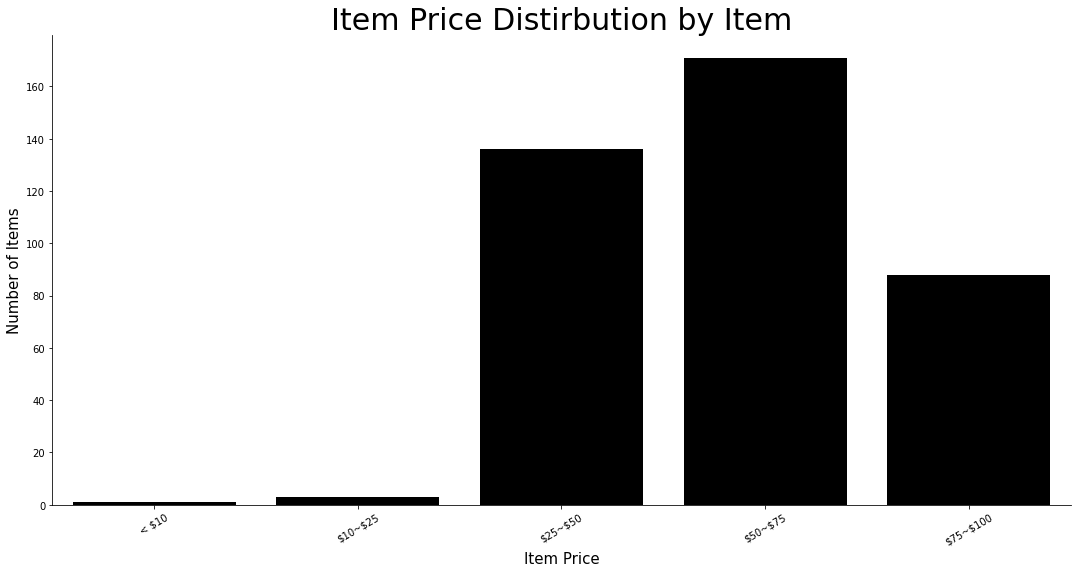

In [51]:
plt.figure(figsize = (15,8))
ax = plt.subplot()
sns.countplot(data = product4, x= 'price range3',order = labels4,color='black')
ax.set_xticklabels(labels4,rotation=30,color='black')
plt.title('Item Price Distirbution by Item',fontsize = 30)
plt.tight_layout()
plt.xlabel('Item Price',fontsize=15)
plt.ylabel('Number of Items',fontsize=15)
sns.despine(top = True, right = True)
plt.savefig(f'{root_path}/Item Price Distribution by Item_more_details.png')

In [52]:
product2['price range2'].value_counts()

< $50         341
\$50~$75      314
\$200 over    184
\$75~$100     169
\$100~$125     70
\$125~$150     69
\$175~$200     46
\$150~$175     25
Name: price range2, dtype: int64

In [53]:
count_item = [341,314,169,70,69,25,46,184]

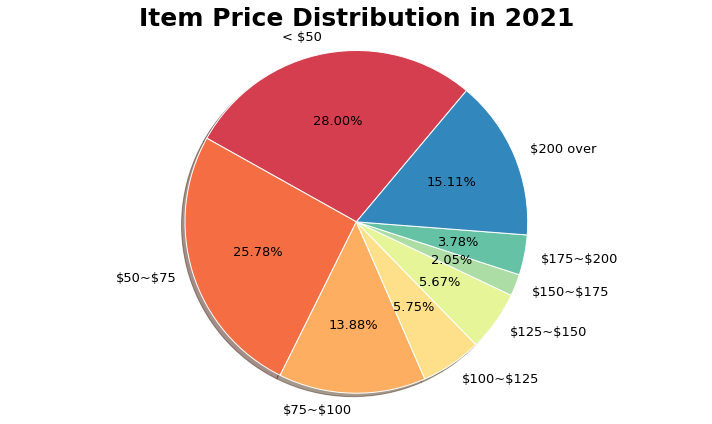

In [54]:
color_pie = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']
colors.reverse()
plt.figure(figsize=(10,6))
ax = plt.subplot()
patches, texts, autotexts = plt.pie(count_item,labels = labels2,wedgeprops={'linewidth': 1, 'edgecolor': 'white'},shadow=True,autopct = '%.2f%%',colors = color_pie,startangle=50,textprops={'size': 13})
plt.setp(autotexts,color = 'black',size='13')
plt.title('Item Price Distribution in 2021',fontsize=25,fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.savefig('Item Price Distribution Pie Chart 2021')

In [55]:
sku = orders[['Lineitem sku','Lineitem name','Lineitem price','Lineitem quantity']]

In [56]:
sku['Lineitem sku'].fillna('No SKU',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [57]:
free = y_2021[y_2021['Shipping Method'] == 'USPS Free Shipping']

In [58]:
free[free['Lineitem quantity'] == 5]

,Name,Shipping Method,year,Lineitem quantity,Lineitem price,Shipping
3840,N12827,USPS Free Shipping,2021,5,35.0,0.0


In [59]:
moon = orders[orders['year'] == '2019']

In [60]:
moon[moon['Shipping Method'] == 'Free Ground Shipping - UPS']

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment Terms Name,Next Payment Due At,date,year
2,SHOPIFY-3046-NADRI,banic2008@gmail.com,paid,2019-07-26 18:11:49 -0400,fulfilled,2019-07-29 16:07:12 -0400,yes,USD,240.00,0.0,0.00,240.00,NaN,0.00,Free Ground Shipping - UPS,2019-07-26 18:11:49 -0400,1,AGEAN GEMSTONE TRIPLET AND WHITE TOPAZ SMALL D...,100.0,NaN,EF36311XQT,True,True,fulfilled,Bani Chakrabarty,3302 Five Oaks Drive,3302 Five Oaks Drive,NaN,NaN,Missouri City,'77459,TX,US,(832) 603-0878,Bani Chakrabarty,3302 Five Oaks Drive,3302 Five Oaks Drive,NaN,NaN,Missouri City,'77459,TX,US,(832) 603-0878,NaN,created_at: 1562105078\nmc_cid: 87fc0942a6,NaN,Shopify Payments,c6369611087931.1,0.00,Sterling,0.0,NaN,NaN,NaN,1.232896e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Texas,Texas,NaN,NaN,"[2019, 07, 29 16:07:12 , 0400]",2019
6,SHOPIFY-3044-NADRI,mhartman13@gmail.com,partially_refunded,NaN,fulfilled,2019-07-26 16:47:10 -0400,no,USD,116.00,0.0,0.00,116.00,NaN,0.00,Free Ground Shipping - UPS,2019-07-26 11:17:37 -0400,1,CYPHER SHAKY NECKLACE - RHODIUM,78.0,NaN,NN35333RCZ,True,True,fulfilled,Michelle Hoyt,402 W 2nd Street Ct,402 W 2nd Street Ct,NaN,NaN,Coal Valley,'61240,IL,US,(865) 809-5658,Michelle Hoyt,402 W 2nd Street Ct,402 W 2nd Street Ct,NaN,NaN,Coal Valley,'61240,IL,US,(865) 809-5658,NaN,NaN,NaN,Shopify Payments,c6403639705659.1,78.00,Brass,0.0,NaN,NaN,NaN,1.232306e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illinois,Illinois,NaN,NaN,"[2019, 07, 26 16:47:10 , 0400]",2019
8,SHOPIFY-3043-NADRI,re43rere@gmail.com,paid,2019-07-26 03:41:36 -0400,fulfilled,2019-07-26 16:46:13 -0400,yes,USD,80.75,0.0,5.35,86.10,WELCOME15,14.25,Free Ground Shipping - UPS,2019-07-26 03:41:35 -0400,1,ROUND CZ PAVE LINE BRACELET - RHODIUM,95.0,NaN,AB16317RCZ,True,True,fulfilled,Marie Panara,1821 Bryn Mawr Avenue,1821 Bryn Mawr Avenue,NaN,NaN,Haddon Heights,'08035,NJ,US,85+18569040081,Marie Panara,1821 Bryn Mawr Avenue,1821 Bryn Mawr Avenue,NaN,NaN,Haddon Heights,'08035,NJ,US,85+18569040081,NaN,NaN,NaN,Shopify Payments,c6402036957243.1,0.00,Brass,0.0,NaN,NaN,NaN,1.231827e+12,NaN,Low,web,0.0,NJ State Tax 6.625%,5.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Jersey,New Jersey,NaN,NaN,"[2019, 07, 26 16:46:13 , 0400]",2019
9,SHOPIFY-3042-NADRI,maral78@aol.com,paid,2019-07-26 00:22:31 -0400,fulfilled,2019-08-14 16:40:43 -0400,yes,USD,75.00,0.0,0.00,75.00,NaN,0.00,Free Ground Shipping - UPS,2019-07-26 00:22:31 -0400,1,AGEAN TURQUOISE AND WHITE TOPAZ SMALL DROP STU...,75.0,NaN,EO36314XTN,True,True,fulfilled,Azita Khanbodaghi,15 North Beacon str #308,15 North Beacon str #308,NaN,NaN,Allston,'02134,MA,US,(617) 208-8270,Azita Khanbodaghi,15 North Beacon str #308,15 North Beacon str #308,NaN,NaN,Allston,'02134,MA,US,(617) 208-8270,NaN,NaN,NaN,PayPal Express Checkout,c6401623031867.1,0.00,Sterling,0.0,NaN,NaN,NaN,1.231702e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Massachusetts,Massachusetts,NaN,NaN,"[2019, 08, 14 16:40:4

In [61]:
moon['Shipping Method'].value_counts()

Free Ground Shipping - UPS              615
Ground Shipping - UPS                   325
USPS Free Shipping                      233
2nd Day UPS                              62
UPS GROUND SHIPPING FEE                  57
Express Worldwide - DHL                  37
2nd Day - UPS                            24
Next Day Air - UPS                       14
Free 2nd Day UPS                          7
2nd Day UPS - Holiday Promotion           7
Free shipping                             6
UPS Ground Shipping Fee                   5
Free Overnight UPS                        3
UPS GROUND SHIPPING                       3
UPS Ground Shipping                       2
Worldwide Express - DHL                   1
DHL WORLDWIDE EXPRESS SHIPMENT            1
DHL Worldwide Express                     1
UPS SHIPPING FEE                          1
DHL WORLDWIDE EXPRESS SHIPPING FEE        1
DHL WorldWide Express Shipping Fee        1
In store shipping                         1
USPS PRIORITY EXPRESS SERVICE   

In [62]:
moon2 = moon.dropna(subset=['Shipping Method'])
moon2['price range'] = moon2['Total'].apply(cat2)
lowest2 = moon2[moon2['price range'] == '< $50']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
pd.set_option('display.min_rows',20)

In [64]:
lowest2['Shipping Method'].value_counts()

Ground Shipping - UPS      146
USPS Free Shipping         107
UPS GROUND SHIPPING FEE     20
Free shipping                4
UPS Ground Shipping Fee      2
2nd Day - UPS                1
Express Worldwide - DHL      1
2nd Day UPS                  1
Worldwide Express - DHL      1
Name: Shipping Method, dtype: int64

In [65]:
joo = orders[orders['year'] == '2018']

In [66]:
pj = orders[orders['year'] == '2017']

In [67]:
pj['Shipping'].value_counts()

0.00     350
4.95      17
14.95     13
15.00     11
29.95      5
49.36      1
11.98      1
Name: Shipping, dtype: int64

In [68]:
joo2 = joo.dropna(subset = ['Shipping Method'])

In [69]:
joo2['price range'] = joo2.Total.apply(cat2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
pd.set_option('display.min_rows',10)

In [74]:
joo2[joo2['price range'] == '\$125~$150' ]

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment Terms Name,Next Payment Due At,date,year,price range
1260,#2180,alisonest89@gmail.com,paid,2018-12-24 00:45:44 -0500,fulfilled,2018-12-24 11:16:24 -0500,no,USD,127.50,0.00,8.45,135.95,WELCOME15,22.50,Free Ground Shipping - UPS,2018-12-24 00:45:43 -0500,1,BLACK ONYX INLAY BOLO BRACELET,150.0,NaN,EB35222TJN,True,True,fulfilled,Alison Esteva Sanders,11 Old Lane,11 Old Lane,NaN,NaN,Montville,'07045,NJ,US,(973) 699-0500,Alison Esteva,"10 Lafayette Ave, Apt 229",10 Lafayette Ave,Apt 229,NaN,Morristown,'07960,NJ,US,(973) 699-0500,NaN,NaN,NaN,Shopify Payments,c5385331998779.1,0.0,Sterling,0.0,NaN,NaN,NaN,8.464493e+11,NaN,Low,web,0.0,NJ State Tax 6.625%,8.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New Jersey,New Jersey,NaN,NaN,"[2018, 12, 24 11:16:24 , 0500]",2018,\$125~$150
1271,#2174,vladimir.gisser@gmail.com,refunded,2018-12-21 21:05:10 -0500,fulfilled,2018-12-26 16:46:26 -0500,yes,USD,134.30,0.00,0.00,134.30,WELCOME15,23.70,Free Ground Shipping - UPS,2018-12-21 21:05:09 -0500,1,LUMIE CZ EAR CLIMBER,158.0,NaN,EO32969TCZ,True,True,fulfilled,Vladimir Gisser,123B River st,123B River st,NaN,NaN,Newton,'02465,MA,US,(617) 476-777,Vladimir Gisser,"123B River st, Unit#B",123B River st,Unit#B,NaN,Newton,'02465,MA,US,(617) 476-777,NaN,NaN,NaN,PayPal Express Checkout,c5375543410747.1,134.3,Sterling,0.0,NaN,NaN,NaN,8.438189e+11,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Massachusetts,Massachusetts,NaN,NaN,"[2018, 12, 26 16:46:26 , 0500]",2018,\$125~$150
1416,#2078,denisvw12@hotmail.com,paid,2018-12-05 18:33:28 -0500,fulfilled,2018-12-06 17:05:09 -0500,no,USD,132.60,14.95,0.00,147.55,WELCOME15,23.40,2nd Day Air - UPS,2018-12-05 18:33:27 -0500,1,TRIPLE ROUND CZ EARRINGS - 3 Colors - RHODIUM,58.0,NaN,EO1165TCZ,True,True,fulfilled,Richard Andreozzi,"12650 NW 25th St, Suite 112",12650 NW 25th St,Suite 112,The Online Store,Miami,'33182,FL,US,(305) 793-8119,Richard Andreozzi,"12650 NW 25th St, Suite 112",12650 NW 25th St,Suite 112,The Online Store,Miami,'33182,FL,US,(305) 793-8119,NaN,NaN,NaN,PayPal Express Checkout,c5287725957179.1,0.0,Sterling,0.0,NaN,NaN,NaN,7.496697e+11,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Florida,Florida,NaN,NaN,"[2018, 12, 06 17:05:09 , 0500]",2018,\$125~$150
1452,#2050,mahwish.yazdani@gmail.com,paid,2018-11-26 04:31:06 -0500,fulfilled,2018-11-26 18:39:07 -0500,yes,USD,140.80,0.00,0.00,140.80,THANKS20,35.20,Free Ground Shipping - UPS,2018-11-26 04:31:06 -0500,1,SMALL PEAR CENTER CZ BOLO NECKLACE - Gold,88.0,NaN,EN35085HCZ,True,True,fulfilled,Wafaa Yazdani,"1545 jade street, 309",1545 jade street,309,NaN,Davis,'95616,CA,US,4084257036,Wafaa Yazdani,"1545 jade street, 309",1545 jade street,309,NaN,Davis,'95616,CA,US,4084257036,NaN,NaN,NaN,PayPal Express Checkout,c5234743738427.1,0.0,Sterling,0.0,NaN,NaN,NaN,7.315796e+11,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,California,NaN,NaN,"[2018, 11, 26 18:39:07 , 0500]",2018,\$125~$15

In [76]:
!git add

fatal: not a git repository (or any of the parent directories): .git


In [72]:
moon[moon['Shipping'] == 4.95]

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment Terms Name,Next Payment Due At,date,year
0,SHOPIFY-3048-NADRI,kjcng3@gmail.com,paid,2019-07-27 17:44:48 -0400,fulfilled,2019-07-29 16:07:41 -0400,yes,USD,60.0,4.95,5.44,70.39,NaN,0.0,Ground Shipping - UPS,2019-07-27 17:44:48 -0400,1,SIRENA DISC DROP HUGGIE EARRINGS - GOLD,60.0,NaN,EO36722XCZ,True,True,fulfilled,Dale Ng,213 Sickletown Road,213 Sickletown Road,NaN,NaN,West Nyack,'10994,NY,US,(845) 358-6521,Dale Ng,213 Sickletown Road,213 Sickletown Road,NaN,NaN,West Nyack,'10994,NY,US,(845) 358-6521,NaN,NaN,NaN,PayPal Express Checkout,c6409455894587.1,0.00,Sterling,0.0,NaN,NaN,NaN,1.234201e+12,NaN,Low,web,0.0,NY State Tax 4%,2.60,Rockland County Tax 4.375%,2.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,New York,NaN,NaN,"[2019, 07, 29 16:07:41 , 0400]",2019
1,SHOPIFY-3047-NADRI,kljaffe@gmail.com,paid,2019-07-27 09:22:42 -0400,fulfilled,2019-08-15 09:56:48 -0400,no,USD,78.0,4.95,0.00,82.95,NaN,0.0,UPS GROUND SHIPPING FEE,2019-07-27 09:22:41 -0400,1,NB11160RCG - Nouveau Vine Brac Rhd,78.0,NaN,NaN,False,True,fulfilled,Kristen Jaffe,539 School House Road,539 School House Road,NaN,NaN,Paradise,'76073,TX,US,19162066068,Kristen Jaffe,539 School House Road,539 School House Road,NaN,NaN,Paradise,'76073,TX,US,19162066068,*CONSUMER SPECIAL ORDER - SHIP OUT IN APPROXIM...,NaN,NaN,PayPal Express Checkout,c6406265307195.1,0.00,NaN,0.0,PJ Moon,NaN,NaN,1.233603e+12,CONS,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Texas,Texas,NaN,NaN,"[2019, 08, 15 09:56:48 , 0400]",2019
5,SHOPIFY-3045-NADRI,fitrairiani@yahoo.com,paid,2019-07-26 12:52:47 -0400,fulfilled,2019-07-26 16:47:30 -0400,yes,USD,68.0,4.95,0.00,72.95,NaN,0.0,Ground Shipping - UPS,2019-07-26 12:52:46 -0400,1,STONE SET PRONG OVAL CZ STUD EARRINGS,68.0,NaN,EO35069TCZ,True,True,fulfilled,Oriella Iriani,1158 Chautauqua Blvd,1158 Chautauqua Blvd,NaN,NaN,Pacific palisades,'90272,CA,US,1 (310) 383-8893,Oriella Iriani,1158 Chautauqua Blvd,1158 Chautauqua Blvd,NaN,NaN,Pacific palisades,'90272,CA,US,1 (310) 383-8893,NaN,NaN,NaN,Shopify Payments,c6403729883195.2,0.00,Sterling,0.0,NaN,NaN,NaN,1.232446e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,California,NaN,NaN,"[2019, 07, 26 16:47:30 , 0400]",2019
10,SHOPIFY-3041-NADRI,joycegmitchell@yahoo.com,paid,2019-07-25 21:23:39 -0400,fulfilled,2019-07-26 16:45:43 -0400,yes,USD,50.0,4.95,0.00,54.95,NaN,0.0,Ground Shipping - UPS,2019-07-25 21:23:38 -0400,1,LANA LONG THREADER EARRINGS - Gold,50.0,NaN,EO36834HCZ,True,True,fulfilled,Joyce Mitchell,"Towne Oaks Apts, 6550 Lexington Dr Apt 237",Towne Oaks Apts,6550 Lexington Dr Apt 237,NaN,Beaumont,77706-5932,TX,US,(409) 543-4131,Joyce Mitchell,"Towne Oaks Apts, 6550 Lexington Dr Apt 237",Towne Oaks Apts,6550 Lexington Dr Apt 237,NaN,Beaumont,77706-5932,TX,US,(409) 543-4131,NaN,NaN,NaN,PayPal Express Checkout,c6401124237371.1,0.00,Sterling,0.0,NaN,NaN,NaN,1.231538e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Texas,Texas

In [73]:
orders2021

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment Terms Name,Next Payment Due At
0,N16080,jserwit@gmail.com,paid,2021-12-31 23:57:44 -0500,fulfilled,2022-01-03 13:01:13 -0500,yes,USD,284.25,0.0,0.0,284.25,NaN,0.0,Free UPS Ground shipping,2021-12-31 23:57:43 -0500,1,LUX CHAIN PIN HINGE CZ STACKED RING - Brass / ...,86.25,115.0,AR38863RCZ7,True,True,fulfilled,Jessica Serwit,37 Bryants Nursery Road,37 Bryants Nursery Road,NaN,NaN,Silver Spring,'20905,MD,US,(202) 578-8270,Jessica Serwit,37 Bryants Nursery Road,37 Bryants Nursery Road,NaN,NaN,Silver Spring,'20905,MD,US,(202) 578-8270,NaN,NaN,NaN,Shopify Payments,c32338501304579.1,0.0,NADRI,0.0,NaN,NaN,NaN,4.626119e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maryland,Maryland,NaN,NaN
1,N16080,jserwit@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 23:57:43 -0500,1,LARGE PAVE INSIDE OUT HOOP - 3 Colors - Sterli...,198.00,NaN,EO33985HCZ,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NADRI.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N16079,kanyada.limsomboon@gmail.com,paid,2021-12-31 23:22:50 -0500,fulfilled,2022-01-03 13:18:27 -0500,no,USD,85.00,15.0,0.0,100.00,NaN,0.0,Express Worldwide - DHL,2021-12-31 23:22:49 -0500,1,CAMILA PEARL AND CZ DROP EARRINGS - Brass / Rh...,35.00,NaN,AO39392RWP,True,True,fulfilled,Kanyada Limsomboon,"C-50-7, Tha Face Platinum Suites, No.1020, Jal...","C-50-7, Tha Face Platinum Suites, No.1020, Jal...",NaN,NaN,Kuala Lumpur,'50250,KUL,MY,'+60 11-1439 2903,Hinako Sada,1-20-45,1-20-45,NaN,NaN,"Tokorozawa-shi,Kita no Minami",359-1156,JP-11,JP,'+81 70-4197-4694,NaN,NaN,NaN,PayPal Express Checkout,c32338392711427.1,0.0,NADRI,0.0,NaN,NaN,NaN,4.626107e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kuala Lumpur,Saitama,NaN,NaN
3,N16079,kanyada.limsomboon@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 23:22:49 -0500,1,CAMILA PEARL AND CZ DROP NECKLACE - Brass / Rh...,50.00,NaN,AN39386RWP,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NADRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N16078,jodi.riley@merz.com,paid,2021-12-31 20:05:38 -0500,fulfilled,2022-01-03 12:58:40 -0500,yes,USD,44.00,5.0,0.0,49.00,BTFZM2JK,11.0,USPS - Flat Rate Shipping,2021-12-31 20:05:37 -0500,1,5MM SOLITAIRE CZ PENDANT - 3 Colors - GOLD / 5mm,55.00,NaN,EN33974HCZ,True,True,fulfilled,Jodi Riley,430 Kendemere Pointe,430 Kendemere Pointe,NaN,NaN,Roswell,'30075,GA,US,(704) 305-8267,Jodi Riley,5046 Willeo Estates Drive,5046 Willeo Estates Drive,NaN,NaN,Marietta,'30068,GA,US,(704) 305-8267,NaN,NaN,NaN,Shopify Payments,c32338282250499.1,0.0,NADRI.925,0.0,NaN,NaN,NaN,4.626036e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Georgia,Georgi